In [1]:
pip install geopandas

In [2]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import geopandas
from shapely import wkt
import plotly.express as px
import random
print('imports completed')

imports completed


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/forbes_billionaires_geo.csv')

# Introduction

This dataset contains list of all the people categorized as Billionaires of 2021 by Forbes in their 35th Annual World's Billionaires List.

Acknowledgements:

Thanks to Python and Web Scraping and of course Forbes Real Time Billionaires list

In [6]:
data.shape

(2755, 13)

In [7]:
data.head(5)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made,geometry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,POINT (-122.3300624 47.6038321)
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,POINT (-97.74369950000001 30.2711286)
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,POINT (2.3514616 48.8566969)
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,POINT (-122.2264453 47.620548)
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,POINT (-122.1598465 37.4443293)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2755 non-null   object 
 1   NetWorth     2755 non-null   float64
 2   Country      2755 non-null   object 
 3   Source       2755 non-null   object 
 4   Rank         2755 non-null   int64  
 5   Age          2630 non-null   float64
 6   Residence    2715 non-null   object 
 7   Citizenship  2739 non-null   object 
 8   Status       2090 non-null   object 
 9   Children     1552 non-null   float64
 10  Education    1409 non-null   object 
 11  Self_made    2737 non-null   object 
 12  geometry     2755 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 279.9+ KB


In [9]:
print(data.dtypes)

Name            object
NetWorth       float64
Country         object
Source          object
Rank             int64
Age            float64
Residence       object
Citizenship     object
Status          object
Children       float64
Education       object
Self_made       object
geometry        object
dtype: object


In [10]:
data.columns

Index(['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age', 'Residence',
       'Citizenship', 'Status', 'Children', 'Education', 'Self_made',
       'geometry'],
      dtype='object')

Features

*  Name : the name and surname of the Billionaires
*  NetWorth : the net worth in billions $
*  Country : the country in which they were born
*  Source : the source of wealth
*  Rank : the position in the Forbes list
*  Age : their age
*  Residence : the city in which they reside
*  Citizenship : the citizenships of them
*  Status : their marital status
*  Children : the number of children they have
*  Education : the name of the school/university they attended
*  Self_made : if they are self-made man or not


credits: https://www.kaggle.com/marcogherbezza/eda-forbes-billionaires-list-2021

# Individuals

In [11]:
#Total Networth $ by Name
data[['Name','NetWorth']].sort_values(by='NetWorth',ascending=False).head(10)

,Name,NetWorth
0,Jeff Bezos,177.0
1,Elon Musk,151.0
2,Bernard Arnault & family,150.0
3,Bill Gates,124.0
4,Mark Zuckerberg,97.0
5,Warren Buffett,96.0
6,Larry Ellison,93.0
7,Larry Page,91.5
8,Sergey Brin,89.0
9,Mukesh Ambani,84.5


Text(0.5, 1.0, 'Total Networth $ by Name')

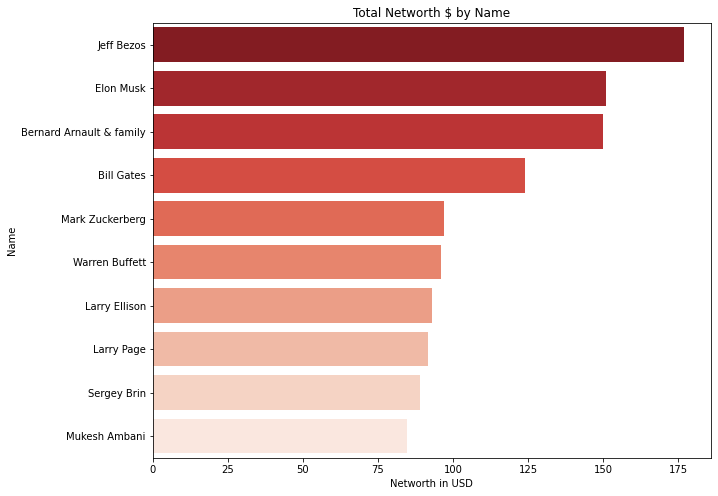

In [12]:
#Total Networth $ by Name (horizonal bar)
plt.figure(figsize=(10,8))
sns.barplot(y='Name', x='NetWorth', data=data[:10], palette='Reds_r')
plt.xlabel('Networth in USD')
plt.title('Total Networth $ by Name')

In [31]:
fig = px.histogram(data[:10], y='NetWorth', x='Name',
                   title='Who are the top 10 richest?',
                   labels={'Name':'Name', 'NetWorth' : 'Billionaire net worth in USD'}, orientation='v', 
                   width=800, height=700)
fig.update_xaxes(categoryorder = 'total descending')
fig.show()

In [14]:
data['Self_made'].value_counts()

True     1960
False     777
Name: Self_made, dtype: int64

Text(0.5, 0, 'Self Made?')

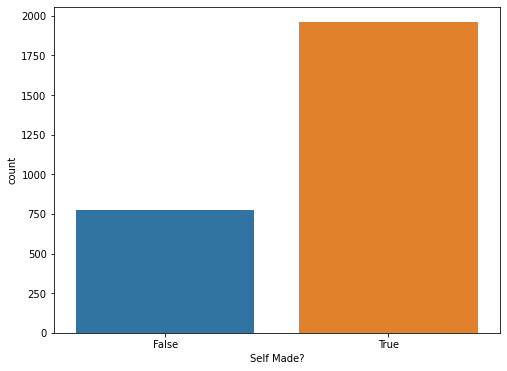

In [15]:
#Networth by self_made or not
plt.figure(figsize=(8,6))
sns.countplot(x='Self_made', data=data)
plt.xlabel('Self Made?')

# Country

In [16]:
total_networth_groupby_country = data.groupby(['Country']).sum()
total_networth_groupby_country = total_networth_groupby_country[['NetWorth']].sort_values('NetWorth', ascending=False)[:10]
total_networth_groupby_country = total_networth_groupby_country.reset_index()
total_networth_groupby_country

,Country,NetWorth
0,United States,4398.4
1,China,2531.9
2,Germany,625.5
3,India,596.4
4,Russia,586.0
5,France,512.2
6,Hong Kong,448.2
7,Canada,231.1
8,Japan,225.4
9,United Kingdom,213.9


Text(0.5, 1.0, 'Distribution of billionaires by Country')

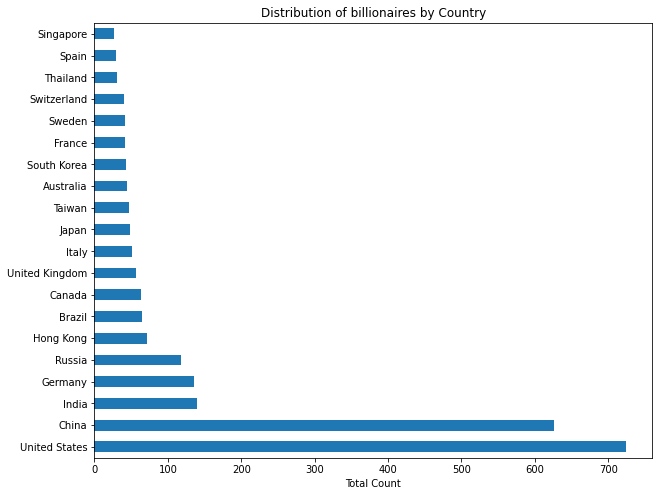

In [17]:
#Distribution Counts of billionaires by Country
plt.figure(figsize=(10,8))
data['Country'].value_counts()[:20].plot(kind='barh')
plt.xlabel('Total Count')
plt.title('Distribution of billionaires by Country')

Text(0.5, 1.0, 'Total Networth $ by Country')

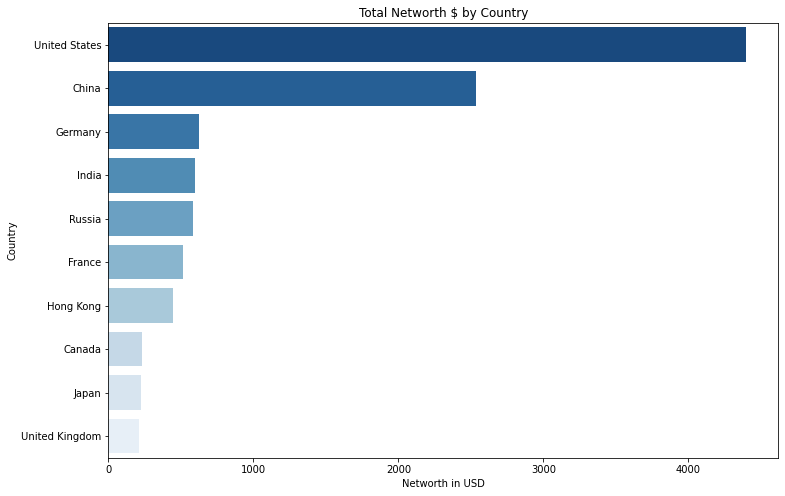

In [18]:
#Total Networth $ by Country
plt.figure(figsize=(12,8))
sns.barplot(y='Country', x='NetWorth', data=total_networth_groupby_country, palette='Blues_r')
plt.xlabel('Networth in USD')
plt.title('Total Networth $ by Country')

In [19]:
import plotly.express as px
  
country = data['Country']
residence = data['Residence']
networth = data['NetWorth']

fig = px.treemap(data, path=[country], values = networth, color_continuous_scale='RdBu', 
                 title='Total Networth $ by Country overview', hover_name = country)
fig.show()

# Source of wealth

In [20]:
fig = px.histogram(data[:20], y='NetWorth', x='Source',
                   title='What are the top 10 richest source?',
                   labels={'Source':'Source of wealth', 'NetWorth' : 'Billionaire net worth in USD'}, orientation='v', 
                   width=800, height=700, color='Source')
fig.update_xaxes(categoryorder = 'total descending')
fig.update_layout(showlegend=False)
fig.show()

Text(0.5, 1.0, 'Distribution of billionaires by Source')

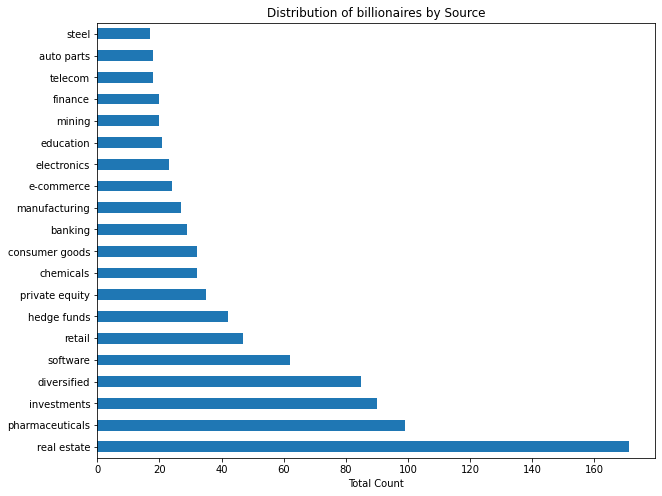

In [21]:
#Distribution Counts of billionaires by Source
plt.figure(figsize=(10,8))
data['Source'].value_counts()[:20].plot(kind='barh')
plt.xlabel('Total Count')
plt.title('Distribution of billionaires by Source')

(-0.5, 1799.5, 799.5, -0.5)

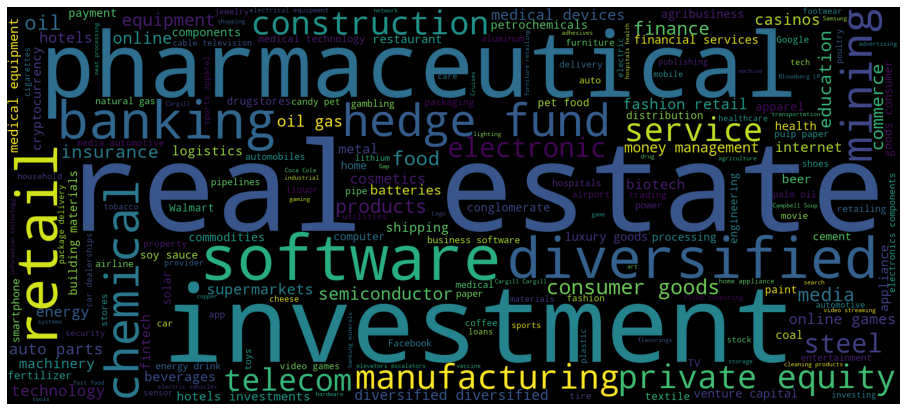

In [42]:
#Distribution Counts of billionaires by Source (via wordcloud)

source_text = ' '.join(data['Source'])
plt.figure(figsize=(16,10))
wordcloud = WordCloud(width = 1800, height = 800, background_color='black').generate(source_text)
plt.imshow(wordcloud)
plt.axis('off')

# Education

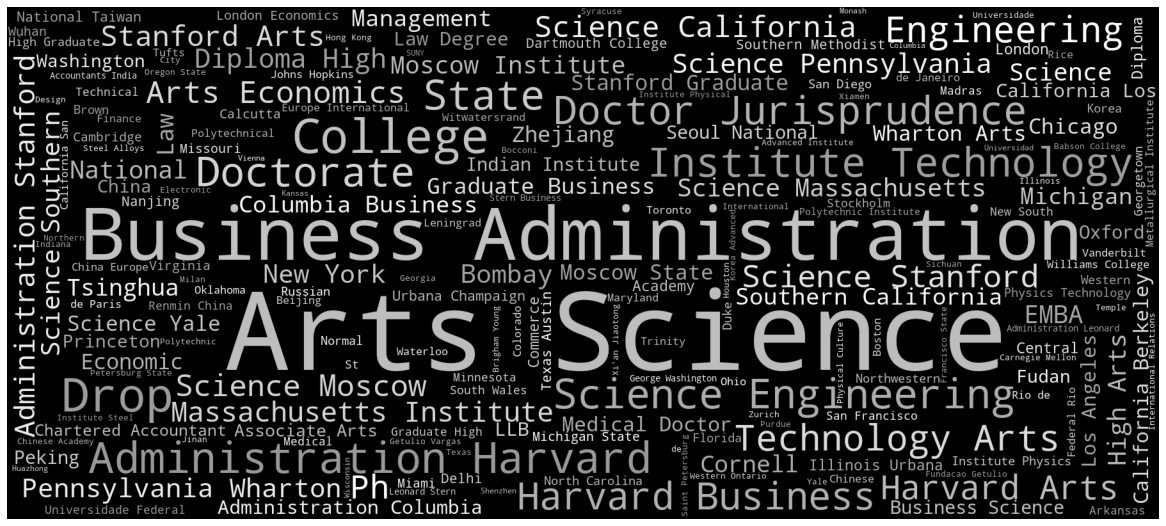

In [41]:
#Distribution Counts of billionaires by Education (via wordcloud)
edu_data = data['Education'].dropna()
edu_text = ' '.join(str(v) for v in edu_data)
edu_text = edu_text.replace('Bachelor', '')
edu_text = edu_text.replace('Master', '')
edu_text = edu_text.replace('University', '')
edu_text = edu_text.replace('School', '')
plt.figure(figsize=(16,10))

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

    return "hsl({}, {}%, {}%)".format(h, s, l)

wordcloud = WordCloud(color_func=grey_color_func, width = 1800, height = 800, background_color='black').generate(edu_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Age

Text(0.5, 1.0, 'Relationship between Age and NetWorth')

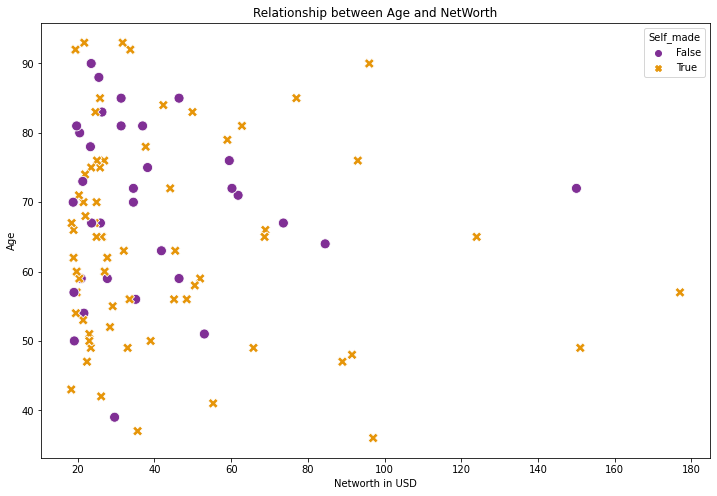

In [24]:
#relationship between age and networth for top100
plt.figure(figsize=(12,8))
sns.scatterplot(x='NetWorth',y='Age', data=data.head(100), hue='Self_made', palette='CMRmap', style='Self_made', s=100)
plt.xlabel('Networth in USD')
plt.ylabel('Age')
plt.title('Relationship between Age and NetWorth')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of Billionaires by Age')

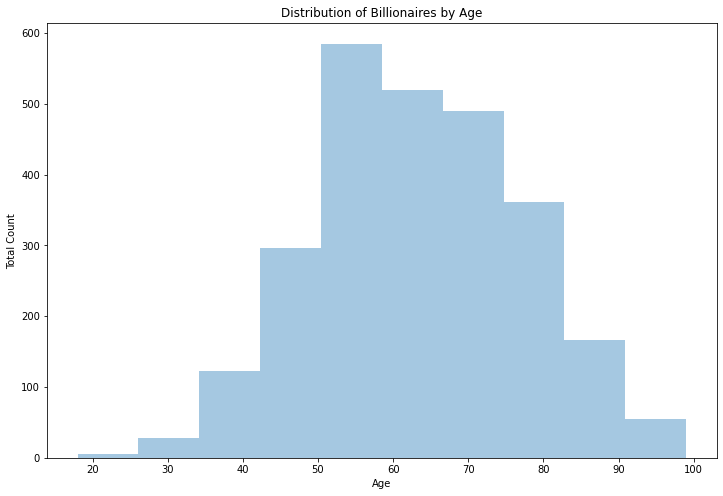

In [25]:
#Distribution of Billionaires by Age
plt.figure(figsize=(12,8))
sns.distplot(data['Age'], hist=True, bins=10, kde=False)
plt.ylabel('Total Count')
plt.title('Distribution of Billionaires by Age')

In [26]:
def age_category(age):
  if age >= 90 : 
    return '90 years old'
  if age >= 80 : 
    return '80 years old'
  if age >= 70 : 
    return '70 years old'
  if age >= 60 : 
    return '60 years old'
  if age >= 50 : 
    return '50 years old'
  if age >= 40 : 
    return '40 years old'
  if age >= 30 : 
    return '30 years old'
  if age >= 20 : 
    return '20 years old'
  else: 
    return 'Below 20 years old'

data['Age Category'] = data['Age'].apply(age_category)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Total Count of Billionaires by Age Category')

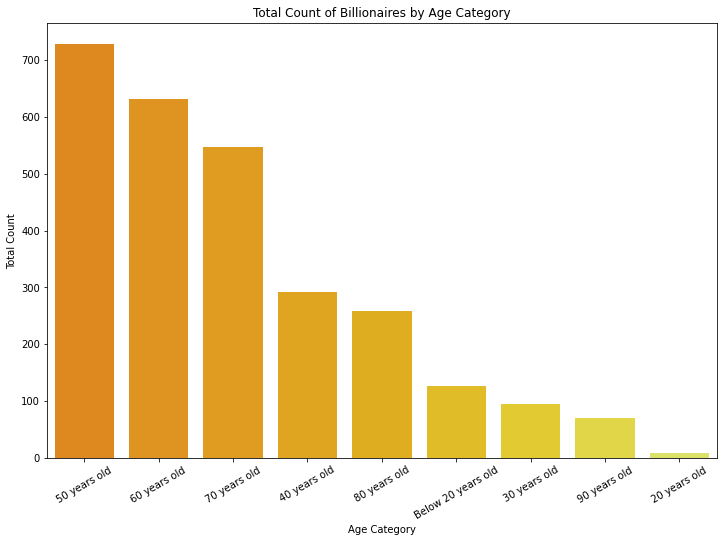

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(data['Age Category'], order=data['Age Category'].value_counts().index, palette='Wistia_r')
plt.ylabel('Total Count')
plt.xticks(rotation=30)
plt.title('Total Count of Billionaires by Age Category')

# Geographical Location

In [28]:
data['geometry'] = geopandas.GeoSeries.from_wkt(data['geometry'])
gdf = geopandas.GeoDataFrame(data, geometry='geometry')

In [29]:
import plotly.express as px
import geopandas as gpd

gdf = geopandas.GeoDataFrame(data, geometry='geometry')

#px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_geo(gdf,
                    lat=gdf.geometry.y,
                    lon=gdf.geometry.x,
                    hover_name="Name",
                    title='Where are the billionaires located?', 
                    color = data['NetWorth'], 
                    color_continuous_scale = 'Bluered', 
                    opacity=.8)
fig.layout.coloraxis.colorbar.title = 'Networth in USD'
fig.show()